In [273]:
import scipy.linalg as lng
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [274]:
a = np.array([[1,0],[1,2]], dtype=float)
a

array([[1., 0.],
       [1., 2.]])

In [275]:
u,s, vh = lng.svd(a)

In [276]:
u

array([[-0.22975292, -0.97324899],
       [-0.97324899,  0.22975292]])

In [277]:
s

array([2.28824561, 0.87403205])

In [278]:
vh

array([[-0.52573111, -0.85065081],
       [-0.85065081,  0.52573111]])

In [279]:
a[:,1]

array([0., 2.])

In [280]:
w = vh[:,0] * s

In [281]:
w @ u

array([1., 1.])

# Exemplo posts

In [282]:
c_names = ['post1', 'post2', 'post3', 'post4']
words = ['ice', 'snow', 'tahoe', 'goal', 'puck']
post_words = pd.DataFrame([[4, 4, 6, 2],
                           [6, 1, 0, 5],
                           [3, 0, 0, 5],
                           [0, 6, 5, 1],
                           [0, 4, 5, 0]],
                          index = words,
                          columns = c_names)
post_words.index.names = ['word:']
post_words

,post1,post2,post3,post4
word:,,,,
ice,4,4,6,2
snow,6,1,0,5
tahoe,3,0,0,5
goal,0,6,5,1
puck,0,4,5,0


Decompondo:

In [283]:
U, sigma, V = np.linalg.svd(post_words)

Matriz V

In [284]:
np.round(V, decimals=2)

array([[-0.4 , -0.57, -0.63, -0.35],
       [-0.6 ,  0.33,  0.41, -0.6 ],
       [ 0.6 , -0.41,  0.32, -0.61],
       [-0.34, -0.63,  0.58,  0.39]])

As colunas 0 e 3 tem valores muito parecidos, assim como as colunas 1 e 2.
Isso mostra a similiridade entre a ocorrencia das palavras dos posts do dataframe acima.

Porém, não podemos olhar para esse dado sozinho.
Os valores do array $\Sigma$ também são importantes nessa análise, pois eles mostram a ordem de magnitude das colunas de V.

In [285]:
sigma

array([13.3221948 ,  9.2609512 ,  2.41918664,  1.37892883])

Como podemos perceber, as colunas 0 e 1 tem uma magnitude maior que as duas últimas, o que demostra que os valores calculados das duas primeiras colunas são mais "importantes" do que os das últimas.

Vamos tentar "remontar" a matriz original com os valores de $\Sigma\ e $U das duas primeiras colunas e das duas últimas

Primeiros:

In [286]:
a_aprox1 = np.matrix(U[:,:2]) * np.diag(sigma[:2]) * np.matrix(V[:2,:])
a_aprox1

matrix([[ 3.19708412,  4.81855605,  5.32573599,  2.79267497],
        [ 5.61979298,  0.58820097,  0.38467542,  5.41220366],
        [ 4.04394318,  0.07166455, -0.12363886,  3.91701473],
        [ 0.68211703,  5.08962774,  5.76212157,  0.33649133],
        [ 0.12939801,  4.21952303,  4.79918534, -0.14394602]])

In [287]:
post_words -a_aprox1

,post1,post2,post3,post4
word:,,,,
ice,0.802916,-0.818556,0.674264,-0.792675
snow,0.380207,0.411799,-0.384675,-0.412204
tahoe,-1.043943,-0.071665,0.123639,1.082985
goal,-0.682117,0.910372,-0.762122,0.663509
puck,-0.129398,-0.219523,0.200815,0.143946


Notamos que a diferença dos valores não da matriz original não chega a um.

Calculando com as colunas 3 e 4:

In [288]:
a_aprox2 = np.matrix(U[:,3:]) * np.diag(sigma[2:]) * np.matrix(V[2:,:])
a_aprox2

matrix([[ 0.53378643,  0.11919483, -0.13591347, -0.55755425],
        [-0.96620559,  0.27806646, -0.18884138,  0.98646677],
        [ 0.98915163, -0.55966694,  0.43548799, -0.997219  ],
        [-0.40517313,  0.6480707 , -0.54719717,  0.38917356],
        [-0.00295376, -0.94708246,  0.83417111,  0.04670727]])

Média de diferença da aproximação das duas primeiras colunas

In [289]:
(post_words -a_aprox1).mean().mean()

0.0038787122475265196

Média das das segunda coluna

In [290]:
(post_words -a_aprox2).mean().mean()

2.8523765198783133

Assim como podemos descobrir o quão similares os posts são, também podemos descobrir o que difere os posts.
Por exemplo, plotando um gráfico que demonstra graficamente as diferenças de valores de $U$ vemos que o que diferencia

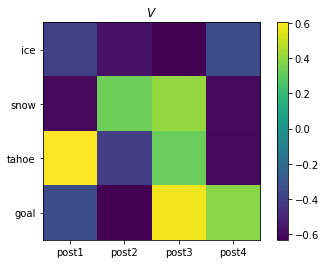

In [291]:
plt.imshow(V, interpolation='none')
plt.xticks(range(len(c_names)))
plt.yticks(range(len(words)))
plt.ylim([len(words) - 1.5, -.5])
ax = plt.gca()
ax.set_xticklabels(c_names)
ax.set_yticklabels(words)
plt.title("$V$")
plt.colorbar();

Percebemos que os posts 1 e 4 realmente são parecidos, menos na palavra "tahoe"

## Eigenvectors

In [292]:
a = np.array([[1,2],[3,5]],dtype=float)
a

array([[1., 2.],
       [3., 5.]])

In [293]:
eigval,eigvec = lng.eig(a)
eigvec

array([[-0.86460354, -0.36126098],
       [ 0.50245469, -0.93246475]])

In [294]:
eigval

array([-0.16227766+0.j,  6.16227766+0.j])

In [297]:
eigval[0] * eigvec[:,0]

array([ 0.14030584-0.j, -0.08153717+0.j])